In [43]:
# Libraries to import
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Datafile load
datafile = pd.read_csv("BankNote_Authentication.csv")

In [45]:
df = datafile.copy()

In [46]:
# Datafile exploration
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [48]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [49]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [50]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### Visualisation

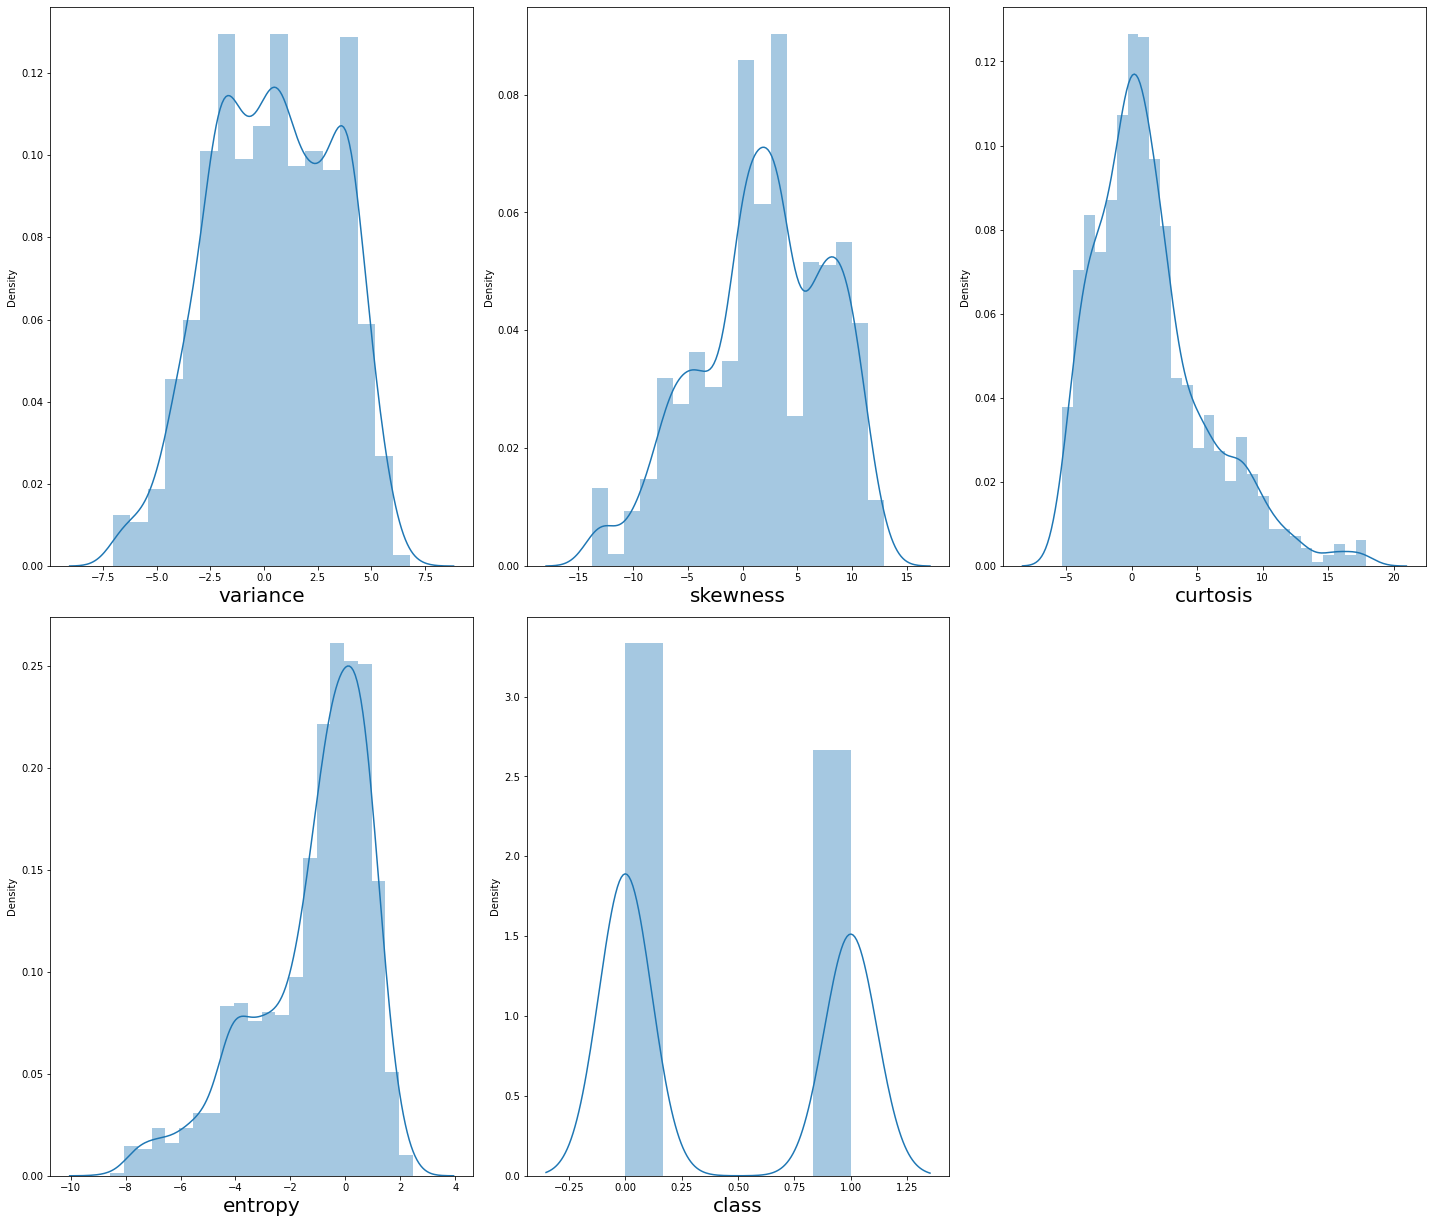

In [51]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=5 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()



warnings.filterwarnings('ignore')

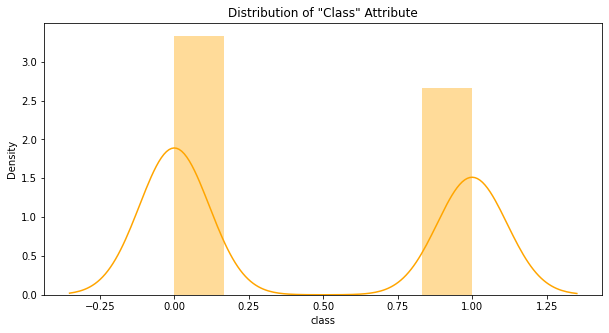

In [52]:
# Target variable 
plt.figure(figsize=(10,5))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'],color='orange')
plt.show()
warnings.filterwarnings('ignore')

In [21]:
#Separation of dependent and independent variables
y = df['class']
x =df.drop(columns = ['class'], axis = 1)

In [22]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [24]:
# # To check for multicollinearity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)
# Thus dataset needs no scaling since the vif for each variable is less than 5.

    feature       VIF
0  variance  1.353257
1  skewness  3.359866
2  curtosis  1.903403
3   entropy  2.169949


In [26]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

### Logistic Regression

In [30]:
model_log = LogisticRegression()
model_log.fit(x_train , y_train)
a = model_log.score(x_train, y_train)
print("                 LOGISTIC MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_log.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 LOGISTIC MODEL           
                                          
Model accuracy on train dataset : 0.99
Model accuracy on test data:      1.0
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[164   1]
 [  0 110]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       0.99      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



The logictic regression model has given 100% accuracy for the test dataset. It's maybe bacause the dataset is too simple.Lets try other models to see their results too.

### Support Vector Machine

In [32]:
model_svc = SVC()
model_svc.fit(x_train , y_train)
a = model_svc.score(x_train, y_train)
print("                 SUPPORT VECTOR CALSSIFIER MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_svc.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 SUPPORT VECTOR CALSSIFIER MODEL           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      1.0
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[165   0]
 [  0 110]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



SVC gives us 100% accuracy both on train and test dataset. Lets try hypertuning the model parameter to see if the result changes.

In [33]:
model_svc1 = SVC(kernel='rbf',gamma='auto')
model_svc1.fit(x_train , y_train)
a = model_svc1.score(x_train, y_train)
print("                 SUPPORT VECTOR CALSSIFIER MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_svc1.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 SUPPORT VECTOR CALSSIFIER MODEL           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      1.0
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[165   0]
 [  0 110]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Random Forest Classifier

In [35]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train , y_train)
a = model_rf.score(x_train, y_train)
print("                 RANDOM FOREST MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_rf.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 RANDOM FOREST MODEL           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      0.99
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[161   4]
 [  0 110]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.96      1.00      0.98       110

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



### K Nearest Neighbour

In [38]:
param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [40]:
model_knn = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)
model_knn.fit(x_train , y_train)
a = model_knn.score(x_train, y_train)
print("                      KNN MODEL(Hyperparamater tuning)       ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_knn.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                      KNN MODEL(Hyperparamater tuning)       
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      1.0
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[165   0]
 [  0 110]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       110

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Thus knn also gives us the maximum score. Thus in with this simple dataset, we can chose any of the model as the final model for our deployment into cloud to make any prediction whether the note is fake or not.